In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from collections import Counter
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, RepeatedKFold

# Business Understanding 

In [2]:
# create the object for see the content of the file 
information = 'auto-mpg.names.txt'
with open(information) as file_object:
    content = file_object.read()
    print(content.rstrip())

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

Este conjuntos de datos es del 7 de julio de 1993, perteneciente the StatLib library el cual es es mantenido por la universidad de Carnegie Mellon
el dataset fue utilizado en 1983 por American Statistical Association Exposition. El dataset que es usado actualmente esta ligeramente modificado
de acuerdo a Ross Quinlan (1993) 8 instancias fueron eliminadas ya que no contribuian en la variable objetivo (mpg):

It is composed of 398 instances with 7 input variables:

* cylinders      Number of cylinders of car, multi-values discrete 
* displacement   Distance traveled by the car in miles, continuos variable  
* horsepower     Automobile horsepower HP, continuos variable 
* weight         Car weight in tons, continuos variable 
* acceleration   Acceleration of the cars in m/s^2
* model year     Model year, multi-valued discrete 
* origin         Manufactured for USA - Japan - Euro, 1,2 and 3 respectively 
* car name       Name of the model (unique for each instance)

The main task of this dataset is predict the Fuel Efficiency:
* mpg            Fuel consumption in miles per gallon, continuos variable

# Data Understanding 

In [138]:
# load the dataframe
df_cars = pd.read_csv('auto-mpg_.csv')
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [139]:
# Shape of the df
df_cars.shape

(398, 9)

In [140]:
# Info our data 
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [141]:
# Ckeck the unique of horsepower, because has  
df_cars.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Nos damos cuenta que hay un valores unicos con como el simbolo de pregunta,
esto se muestra asi porque la columna esta como object y no como numerica

In [142]:
# Convert in numbers the columns horsepower
df_cars['horsepower'] = pd.to_numeric(df_cars['horsepower'], errors='coerce')

In [143]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [144]:
# Check if there are null values 
df_cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [145]:
# Obtain the mean of the column
mean_horse = df_cars['horsepower'].mean() 
print(mean_horse)

104.46938775510205


In [146]:
# fill the missing values with the mean 
df_cars.horsepower = df_cars.horsepower.fillna(mean_horse)

In [147]:
df_cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [148]:
# Maybe is necessary make a transformation, because the columns weightand horsepower
# can cause problems to our model 
# Basic estadistics 
df_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


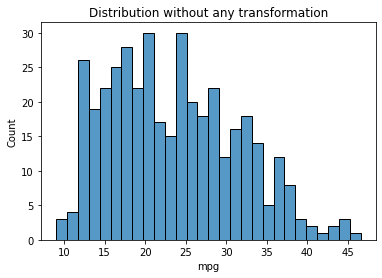

In [78]:
# check the distribution of the variable to predict 
sns.histplot(df_cars['mpg'], bins=28)
plt.title('Distribution without any transformation')
plt.savefig('distribution_mpg.png')
plt.show()

## IDK

In [33]:
df_cars['mpg_2'] = np.log(df_cars['mpg']+1)

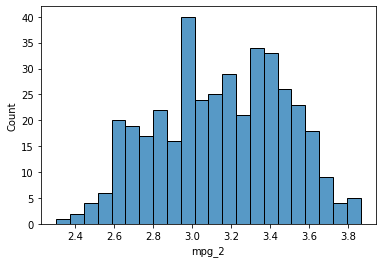

In [34]:
# check the distribution of the variable to predict 
sns.histplot(df_cars['mpg_2'], bins=22)
plt.show()

## IDK

In [36]:
# Skewness of mpg
print(f"Skewness: {df_cars['mpg_2'].skew():.3f}")

Skewness: -0.109


In [76]:
# Skewness of mpg
print(f"Skewness: {df_cars['mpg'].skew():.3f}")

Skewness: 0.457


The data is slightly symmetrical

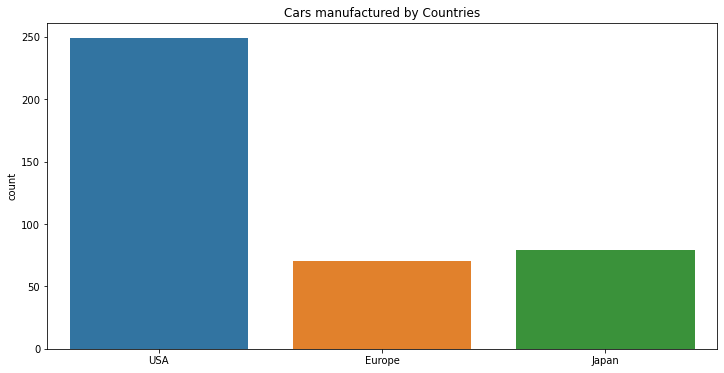

In [15]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'USA'
labels[1] = 'Europe'
labels[2] = 'Japan'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.savefig('cars manufatured.png')
plt.show()

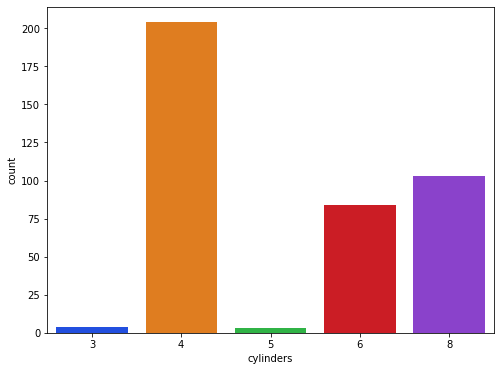

In [16]:
# watch the numbers of cylinders 
plt.figure(figsize=(8,6))
sns.countplot(x=df_cars.cylinders, data=df_cars, palette = "bright")
plt.show()

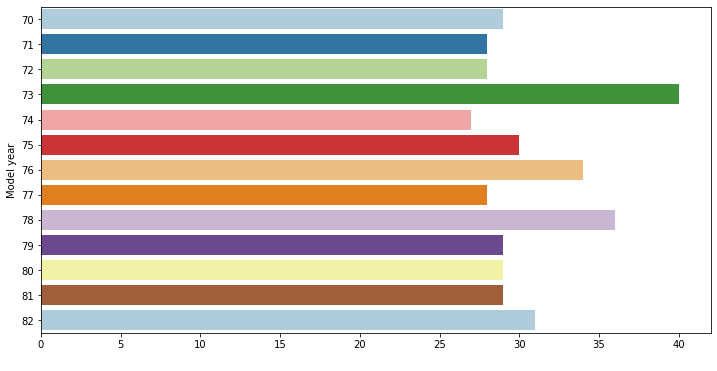

In [17]:
# graph of numbers of cars for years
plt.figure(figsize=(12,6))
sns.countplot(y=df_cars['model year'],palette = "Paired")
plt.ylabel('Model year')
plt.xlabel(' ')
plt.savefig('number of cars every year.png')
plt.show()

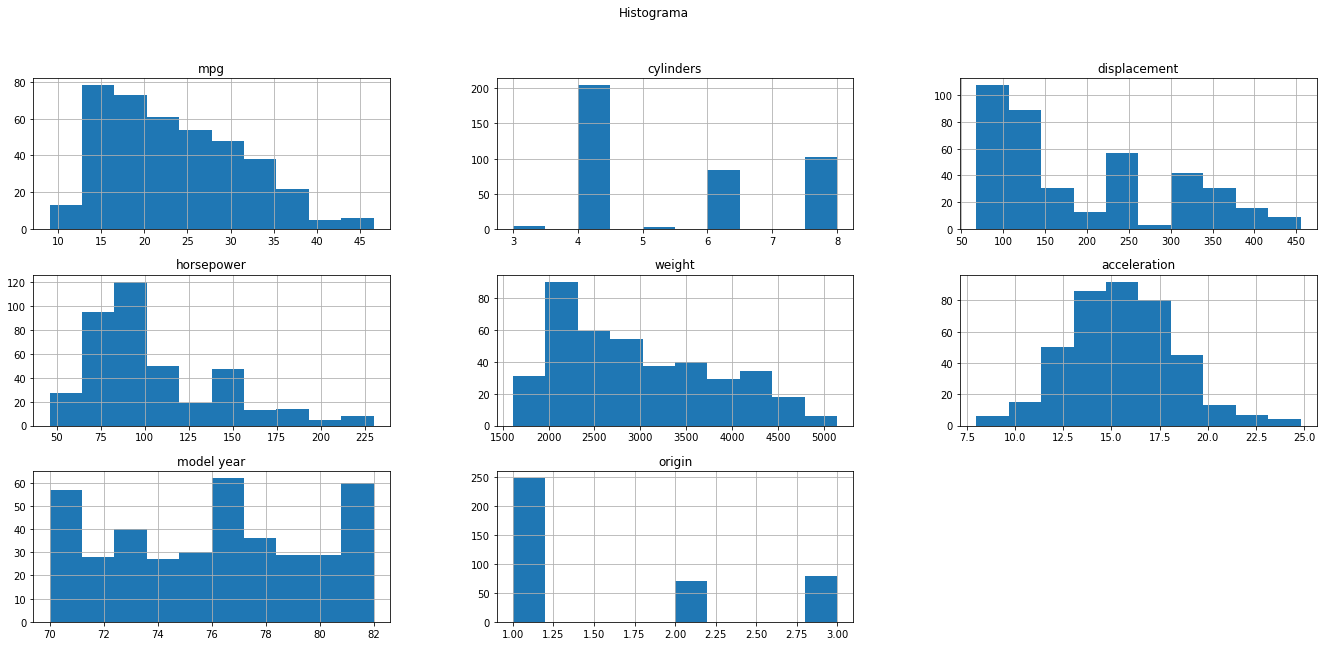

In [18]:
# variable distribution
#plt.figure(figsize = (23,10), column=[i for i in df_cars.columns[:8]])
df_cars.hist(figsize=(23,10), column=[i for i in df_cars.columns[:8]])
plt.suptitle('Histograma')
plt.savefig('all_hist.png')
plt.show()

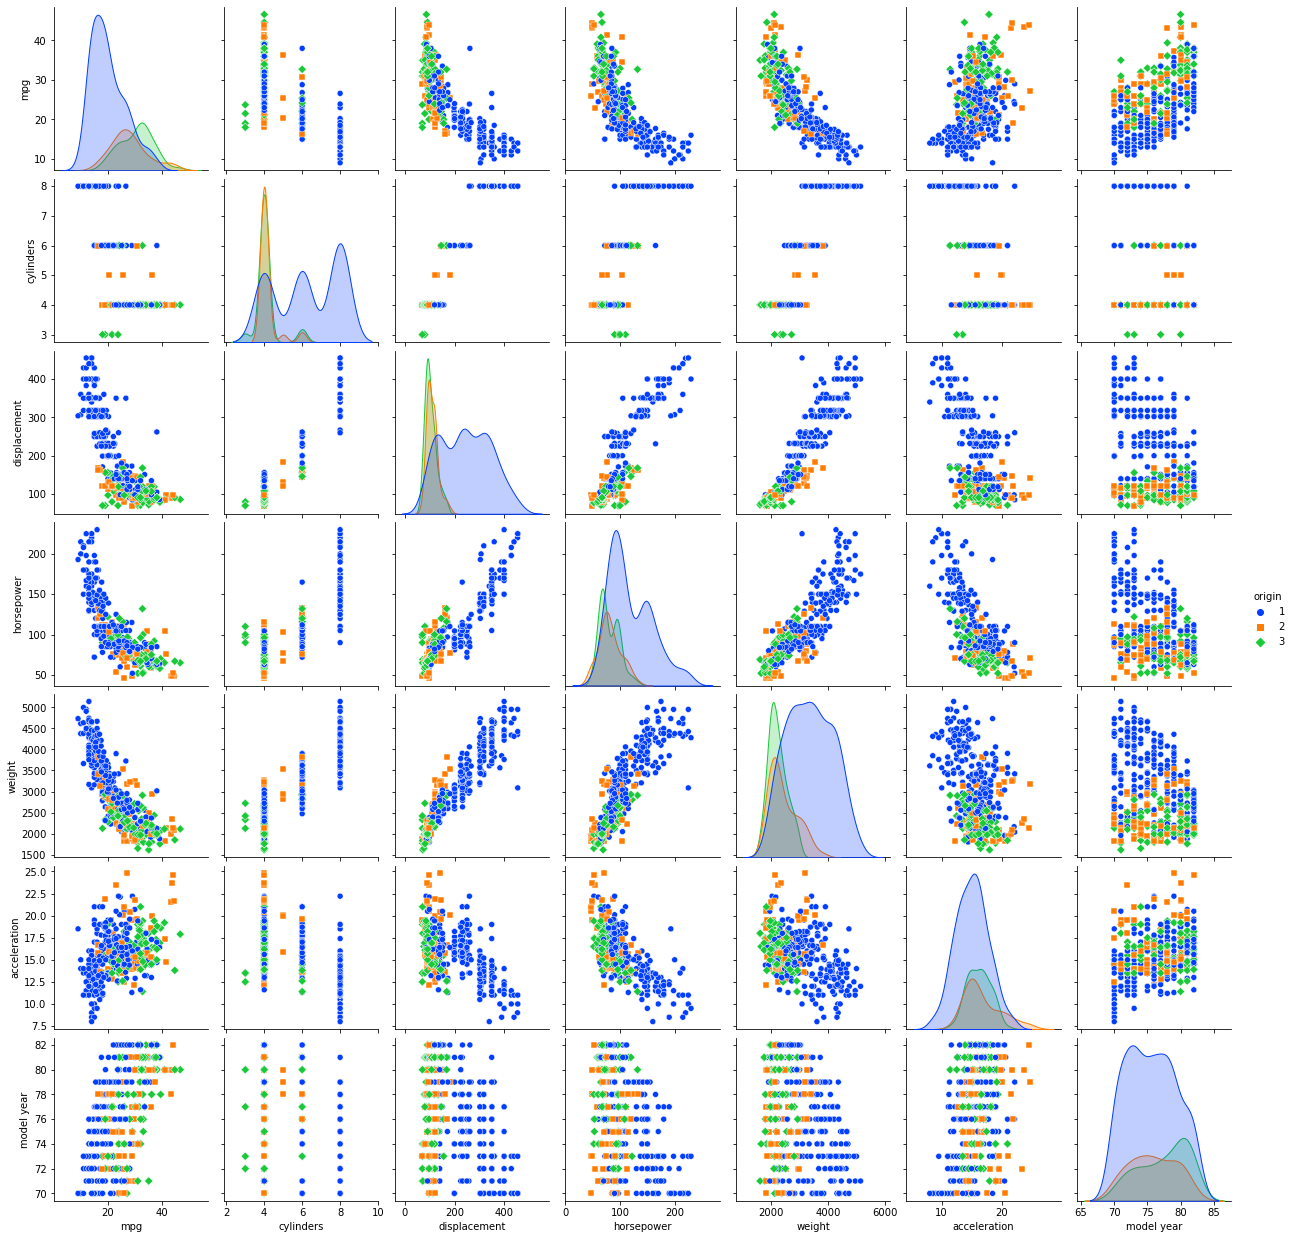

In [19]:
g = sns.pairplot(df_cars, hue ='origin', markers=["o", "s", "D"], palette = "bright")
plt.savefig('paiplot.png')
plt.show()

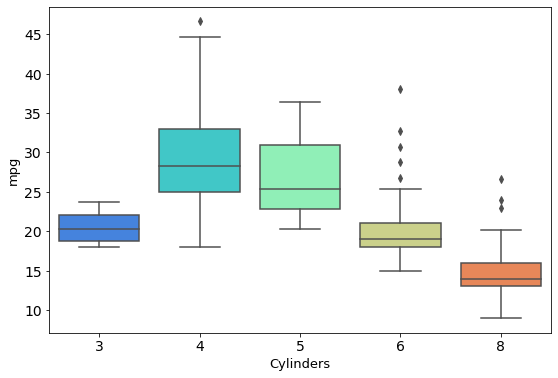

In [210]:
# make a boxplot between mpg and cylinders 
plt.figure(figsize=(9,6))
sns.boxplot(y='mpg', x='cylinders', data=df_cars, palette = "rainbow")
plt.xlabel('Cylinders',fontsize = 13)
plt.ylabel('mpg', fontsize = 13)
plt.tick_params(axis='both', labelsize=14)
plt.show()

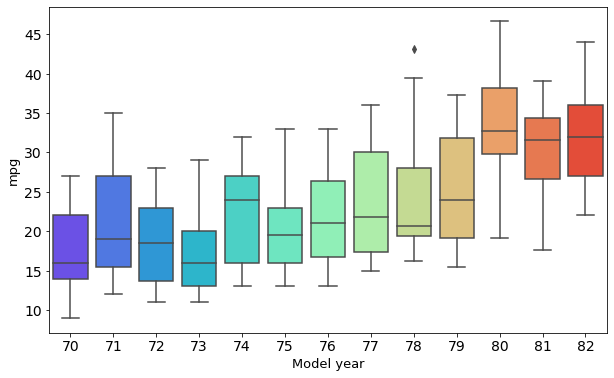

In [211]:
# Boxplot between mpg and model year
plt.figure(figsize=(10,6))
sns.boxplot(y='mpg', x='model year', data=df_cars, palette = "rainbow")
plt.xlabel('Model year',fontsize = 13)
plt.ylabel('mpg', fontsize = 13)
plt.tick_params(axis='both', labelsize=14)
plt.show()

In [141]:
# Matrix Correlation
corr_matrix = df_cars.corr()

In [142]:
corr_matrix.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024


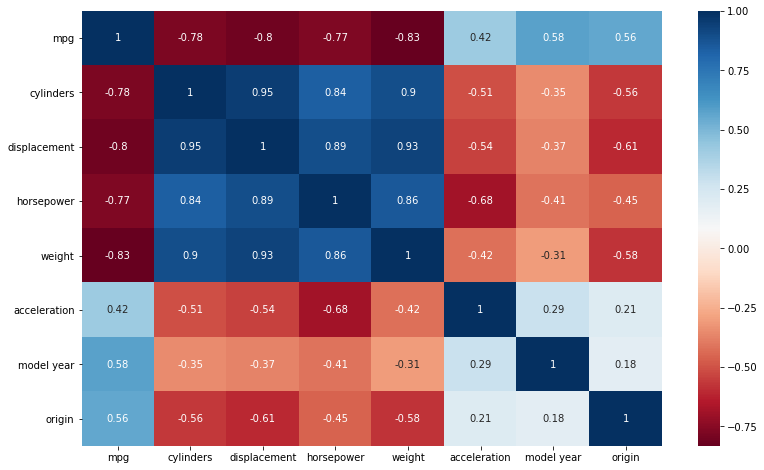

In [564]:
# Show the matrix of correlation
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'RdBu')
plt.savefig('correlation_matrix.png')
plt.show()

# Data Preparation

In [74]:
# Apply log in the target variable
df_cars['mpg_2'] = np.log(df_cars['mpg'])

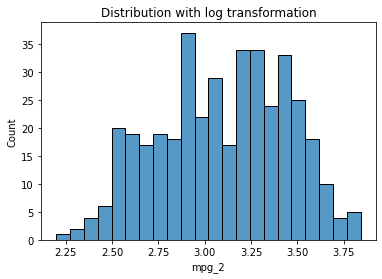

In [79]:
# check the distribution of the variable to predict 
sns.histplot(df_cars['mpg_2'], bins=22)
plt.title('Distribution with log transformation')
plt.savefig('distributon_w_log.png')
plt.show()

## Apply log transformation

In [149]:
log_df = df_cars.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)

In [150]:
log_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,2.890372,2.079442,5.726848,4.867534,8.161660,2.484907,4.248495,0.000000,chevrolet chevelle malibu
1,2.708050,2.079442,5.857933,5.105945,8.214194,2.442347,4.248495,0.000000,buick skylark 320
2,2.890372,2.079442,5.762051,5.010635,8.142063,2.397895,4.248495,0.000000,plymouth satellite
3,2.772589,2.079442,5.717028,5.010635,8.141190,2.484907,4.248495,0.000000,amc rebel sst
4,2.833213,2.079442,5.710427,4.941642,8.145840,2.351375,4.248495,0.000000,ford torino
...,...,...,...,...,...,...,...,...,...
393,3.295837,1.386294,4.941642,4.454347,7.933797,2.747271,4.406719,0.000000,ford mustang gl
394,3.784190,1.386294,4.574711,3.951244,7.663877,3.202746,4.406719,0.693147,vw pickup
395,3.465736,1.386294,4.905275,4.430817,7.738488,2.451005,4.406719,0.000000,dodge rampage
396,3.332205,1.386294,4.787492,4.369448,7.872836,2.923162,4.406719,0.000000,ford ranger


In [384]:
log_df.drop(['car name', 'mpg_2'], axis=1, inplace=True)

In [385]:
log_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,2.890372,2.079442,5.726848,4.867534,8.161660,2.484907,4.248495,0.0
1,2.708050,2.079442,5.857933,5.105945,8.214194,2.442347,4.248495,0.0
2,2.890372,2.079442,5.762051,5.010635,8.142063,2.397895,4.248495,0.0
3,2.772589,2.079442,5.717028,5.010635,8.141190,2.484907,4.248495,0.0
4,2.833213,2.079442,5.710427,4.941642,8.145840,2.351375,4.248495,0.0


In [91]:
#input variables
input_variables = df_cars[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
#target variable
target_variable = df_cars['mpg']

In [92]:
# Split the data 
X_train, X_test01, y_train, y_test = train_test_split(input_variables, target_variable, test_size = 0.2)

## Filter

In [93]:
# Use SeleckBest
selector = SelectKBest(score_func=f_regression, k=6)
selector.fit(X_train, y_train)

SelectKBest(k=6, score_func=<function f_regression at 0x0000021C466D5DC8>)

In [94]:
data_train_filtered = selector.transform(X_train)
data_test_filtered = selector.transform(X_test01)

In [95]:
print("Train Original:    ", X_train.shape)
print("Test Original:     ", X_test01.shape)
print("Train Transformado:", data_train_filtered.shape)
print("Test Transformado: ", data_test_filtered.shape)

Train Original:     (318, 7)
Test Original:      (80, 7)
Train Transformado: (318, 6)
Test Transformado:  (80, 6)


In [96]:
print(data_train_filtered[:5])

[[4.000e+00 1.510e+02 8.800e+01 2.740e+03 7.700e+01 1.000e+00]
 [6.000e+00 2.250e+02 1.050e+02 3.613e+03 7.400e+01 1.000e+00]
 [8.000e+00 3.020e+02 1.400e+02 3.449e+03 7.000e+01 1.000e+00]
 [8.000e+00 3.180e+02 1.500e+02 3.940e+03 7.600e+01 1.000e+00]
 [8.000e+00 3.500e+02 1.550e+02 4.360e+03 7.900e+01 1.000e+00]]


In [97]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
234,4,151.0,88.0,2740,16.0,77,1
135,6,225.0,105.0,3613,16.5,74,1
4,8,302.0,140.0,3449,10.5,70,1
208,8,318.0,150.0,3940,13.2,76,1
289,8,350.0,155.0,4360,14.9,79,1


In [98]:
print(data_test_filtered[:5])

[[8.000e+00 3.020e+02 1.400e+02 4.294e+03 7.200e+01 1.000e+00]
 [4.000e+00 8.600e+01 6.500e+01 1.975e+03 7.900e+01 3.000e+00]
 [4.000e+00 9.700e+01 6.000e+01 1.834e+03 7.100e+01 2.000e+00]
 [8.000e+00 3.040e+02 1.200e+02 3.962e+03 7.600e+01 1.000e+00]
 [6.000e+00 2.250e+02 1.050e+02 3.121e+03 7.300e+01 1.000e+00]]


In [99]:
X_test01.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
74,8,302.0,140.0,4294,16.0,72,1
294,4,86.0,65.0,1975,15.2,79,3
55,4,97.0,60.0,1834,19.0,71,2
189,8,304.0,120.0,3962,13.9,76,1
97,6,225.0,105.0,3121,16.5,73,1


cylinders
displacement
horsepower
weight
origin

## RFE

In [425]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [426]:
data_train_rfe = rfe.transform(X_train)
data_test_rfe = rfe.transform(X_test01)

In [427]:
print("Train Original:    ", X_train.shape)
print("Test Original:     ", X_test01.shape)
print("Train Transformado:", data_train_rfe.shape)
print("Test Transformado: ", data_test_rfe.shape)

Train Original:     (318, 5)
Test Original:      (80, 5)
Train Transformado: (318, 5)
Test Transformado:  (80, 5)


In [428]:
rfe.ranking_

array([1, 1, 1, 1, 1])

In [453]:
log_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [461]:
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
log_df2 = log_df[columns]

In [462]:
type(log_df2)

pandas.core.frame.DataFrame

In [463]:
# Iterando por sobre todas las características e imprimiendo la clasificación correspondiente
for i in range(len(rfe.ranking_)):
    print("{:7s}: {:3d}".format(log_df2.columns[i], rfe.ranking_[i]))

cylinders:   1
displacement:   1
horsepower:   1
weight :   1
acceleration:   1


In [455]:
#input variables
input_variables = log_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
#target variable
target_variable = log_df['mpg']

In [456]:
# Split the data 
X_train, X_test01, y_train, y_test = train_test_split(input_variables, target_variable, test_size = 0.25)

# Modeling 

In [457]:
# 1. Model Creation
model01 = LinearRegression()

# 2. Model Fit
model01.fit(X_train, y_train)

LinearRegression()

In [458]:
intercept = model01.intercept_
coefficients = model01.coef_

print(f"w0 = {intercept:5.2f}")

for i in range(1,len(coefficients) + 1):
    print(f"w{i:d} = {coefficients[i-1]:5.2f}")

w0 = -0.06
w1 = -0.18
w2 =  0.07
w3 = -0.27
w4 = -0.60
w5 = -0.10
w6 =  2.16
w7 =  0.06


In [459]:
y_test.shape

(100,)

In [460]:
# Model Prediction
y_pred01_test = model01.predict(X_test01)


# Obtaining prediction for train_set
y_pred01_train = model01.predict(X_train)

In [461]:
# Obtaining RMSE for tesr set and tran set 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred01_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred01_train))

# Obtaining R2
R2_test = model01.score(X_test01, y_test)
R2_train = model01.score(X_train, y_train)

In [462]:
print(f'Test set RMSE = {rmse_test}')
print(f'Train set RMSE = {rmse_train}')

print(f'\nTest set R2 = {R2_test}') 
print(f"Train set R2= {R2_train}")

Test set RMSE = 0.11707732950970741
Train set RMSE = 0.11246723545600432

Test set R2 = 0.8749772912597168
Train set R2= 0.8917449554564357


In [463]:
string = print(f'R^2={R2_test}')

R^2=0.8749772912597168


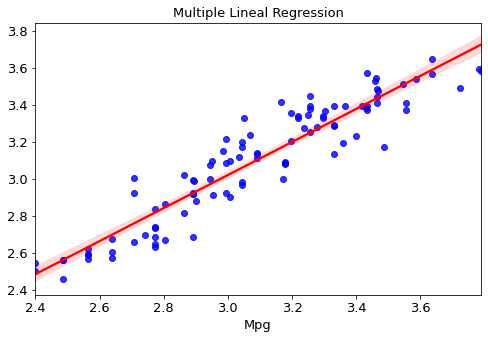

In [464]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred01_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Multiple Lineal Regression', fontsize=13)
plt.xlabel('Mpg', fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.savefig('multiple lineal regression.png')
plt.show()

## Using 5-Fold Cross Validation

In [263]:
kf = KFold(n_splits = 5)

In [264]:
model_wkf = LinearRegression()

y_predict02 = cross_val_predict(model_wkf,
                                   input_variables,
                                   target_variable,
                                   cv = kf)

# Obtain the RMSE
rmse_kf = np.sqrt(mean_squared_error(target_variable, y_predict02))
print(f'RMSE using K-fold Cross-validation: {rmse_kf}')

RMSE using K-fold Cross-validation: 0.13117494279079595


In [265]:
# Obtaining R2
r2_kf = r2_score(target_variable, y_predict02)
print(f'R^2 is: {r2_kf}')

R^2 is: 0.8504745891681122


## Using ElasticNet

In [266]:
# Creating an Elastic Net object
model_elasticNet = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [267]:
# Fitting the data
model_elasticNet.fit(X_train, y_train)

# Obtaining predictions
net_ypred_test = model_elasticNet.predict(X_test01)
net_ypred_train = model_elasticNet.predict(X_train)

In [268]:
# Obtaining RMSE
net_rmse_test = np.sqrt(mean_squared_error(y_test, net_ypred_test))
net_rmse_train = np.sqrt(mean_squared_error(y_train, net_ypred_train))

# Obtaining R^2 
net_r2_test = r2_score(y_test, net_ypred_test)
net_r2_train = r2_score(y_train, net_ypred_train)

In [269]:
# Obtaining the metrics
print(f'Test set RMSE = {net_rmse_test}')
print(f'Train set RMSE = {net_rmse_train}')

print(f'\nTest set R2 = {net_r2_test}') 
print(f"Train set R2 = {net_r2_train}")

Test set RMSE = 0.22513667159449524
Train set RMSE = 0.20969908363859271

Test set R2 = 0.5825289007768912
Train set R2 = 0.6101087819568882


In [270]:
# Creating a Kfold object
kf_2 = KFold(n_splits = 5)

# Creating an Elastic Net object
model_elasticNet_cv = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

# Obtaining prediction
y_pred_netcv = cross_val_predict(model_elasticNet_cv,
                                 input_variables,
                                 target_variable,
                                 cv = kf_2)

In [271]:
# Obtaining RMSE
rmse_netcv = np.sqrt(mean_squared_error(target_variable, y_pred_netcv))

# Obtaining R2
r2_netcv = r2_score(target_variable, y_pred_netcv)

In [272]:
# Obtaining the metrics
print('RMSE =', rmse_netcv)
print('R2 =', r2_netcv)

RMSE = 0.24392259400066127
R2 = 0.4829681499414076


## Using ElasticNetcv

In [465]:
# param grid
model_elasticnetcv = ElasticNetCV(
    alphas = [0.1, 0.01, 0.005, 0.0025, 0.001],
    l1_ratio = [.01, .05, .25, .5, .75, .95, .99],
    cv = 5
)

In [466]:
# fitting data with best params
model_elasticnetcv.fit(X_train, y_train)

# Obtaining predictions on the test set
y_pred_elastCV_test = model_elasticnetcv.predict(X_test01)

# Obtaining predictions on the training set 
y_pred_elastCV_training = model_elasticnetcv.predict(X_train)

In [467]:
# Obtaining RMSE of the test set
elastic1_cv_rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastCV_test))
# Obtaining RMS of the train set 
elastic2_cv_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_elastCV_training))
# Obtaining R^2 score
# elastic1_cv_r2 = r2_score(y_test, y_pred_elastCV)

In [468]:
print(f'TEST SET\nalpha = {model_elasticnetcv.alpha_}\nl1 ratio = {model_elasticnetcv.l1_ratio_}\nRMSE = {elastic1_cv_rmse}\nR2 = {model_elasticnetcv.score(X_test01, y_test)}')
print(f'\n\nTRAIN SET\nalpha = {model_elasticnetcv.alpha_}\nl1 ratio = {model_elasticnetcv.l1_ratio_}\nRMSE = {elastic2_cv_rmse_train}\nR2 = {model_elasticnetcv.score(X_train, y_train)}')

TEST SET
alpha = 0.001
l1 ratio = 0.99
RMSE = 0.1228473065902345
R2 = 0.8623505226667268


TRAIN SET
alpha = 0.001
l1 ratio = 0.99
RMSE = 0.11544234505822618
R2 = 0.8859418340750316


No handles with labels found to put in legend.


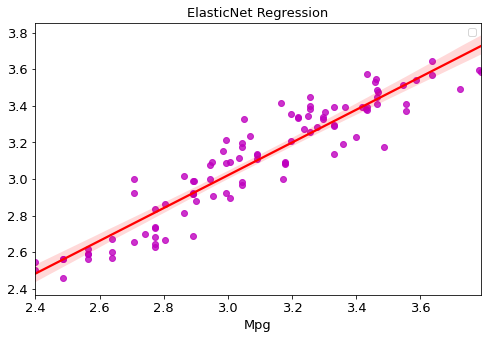

In [469]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred01_test, scatter_kws={"color": "m"}, line_kws={"color": "red"})
plt.title('ElasticNet Regression', fontsize=13)
plt.xlabel('Mpg', fontsize=13)
plt.legend()
plt.tick_params(axis='both', labelsize=13)
plt.savefig('elasticnet regression.png')
plt.show()

## Using Lasso Regression

In [541]:
model_lasso = Lasso(alpha=10, max_iter=100, tol=0.1)

model_lasso.fit(X_train, y_train)

Lasso(alpha=10, max_iter=100, tol=0.1)

In [542]:
R2_lasso = model_lasso.score(X_test01, y_test)
print(f'R^2 in test set is = {R2_lasso}')

R^2 in test set is = -0.013963674277697624


In [543]:
R2_lasso_train = model_lasso.score(X_train, y_train)
print(f'R^2 in train set is = {R2_lasso_train}')

R^2 in train set is = 0.0


In [ ]:
# CARO

In [470]:
alphas = [.000001, .00001, .0001, .01, .1, 1, 0.5, 3, 5, 10, 15, 100]

In [471]:
model_c = LassoCV(alphas=alphas, cv=5)

#fit
model_c.fit(X_train, y_train)

LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.01, 0.1, 1, 0.5, 3, 5, 10, 15, 100],
        cv=5)

In [472]:
y_pred_lc = model_c.predict(X_test01)

In [473]:
rmse_lc = mean_squared_error(y_test, y_pred_lc, squared=False)
r2_lc = r2_score(y_test, y_pred_lc)
print('RMSE = ', rmse_lc)
print('R^2 = ', r2_lc)
print('Alpha = ', model_c.alpha_)

RMSE =  0.11707544180316995
R^2 =  0.8749813228563201
Alpha =  1e-06


In [474]:
# obtain the alpha 
model_c.alpha_

1e-06

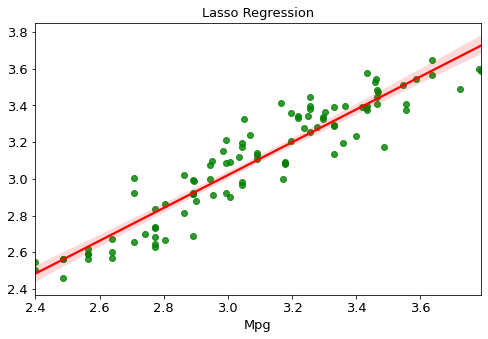

In [475]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred_lc, scatter_kws={"color": "g"}, line_kws={"color": "red"})
plt.title('Lasso Regression', fontsize=13)
plt.xlabel('Mpg', fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.savefig('Lasso Regression.png')
plt.show()

## Using Ridge Regression

In [544]:
ridge_regre = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_regre.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [545]:
ridge_regre.score(X_test01, y_test)

0.7713762804533577

In [546]:
R2_ridge_train = model_lasso.score(X_train, y_train)
print(f'R^2 in train set is = {R2_ridge_train}')

R^2 in train set is = 0.0


In [ ]:
#CARO

In [476]:
model_rc = RidgeCV(alphas=alphas, cv=5)

#fit values
model_rc.fit(X_train, y_train)

RidgeCV(alphas=array([1.0e-06, 1.0e-05, 1.0e-04, 1.0e-02, 1.0e-01, 1.0e+00, 5.0e-01,
       3.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 1.0e+02]),
        cv=5)

In [477]:
y_pred_rc = model_rc.predict(X_test01)

In [478]:
rmse_rc = mean_squared_error(y_test, y_pred_lc, squared=False)
r2_rc = r2_score(y_test, y_pred_lc)
print('RMSE = ', rmse_rc)
print('R^2 = ', r2_rc)
print(f'Alpha = {model_rc.alpha_}')

RMSE =  0.11707544180316995
R^2 =  0.8749813228563201
Alpha = 1e-06


In [479]:
model_rc.alpha_

1e-06

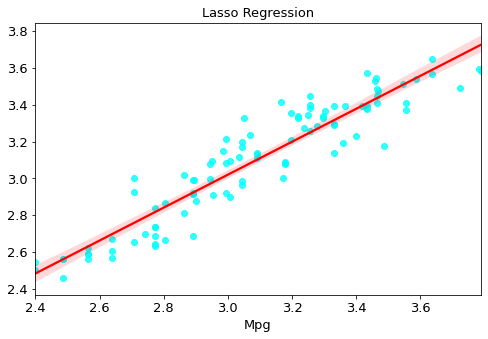

In [480]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred_rc, scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
plt.title('Lasso Regression', fontsize=13)
plt.xlabel('Mpg', fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.savefig('Ridge Regression.png')
plt.show()